In [1]:
import numpy as np
from sklearn.decomposition import PCA
from numpy import linalg as LA
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from matplotlib.pyplot import figure
import math as m 

file = open('PM10.txt','r')
data = file.read()
data

'"Date","Time","NR","PM GR","PM JU","T GR","T KL"\n"01.10.10","00:00",1,13.69,12.76,10.07,6.61\n"01.10.10","00:30",2,13.34,13.29,10.15,6.71\n"01.10.10","01:00",3,14.13,12.92,9.95,6.68\n"01.10.10","01:30",4,17.56,11.83,9.88,6.55\n"01.10.10","02:00",5,16.89,11.63,9.79,6.6\n"01.10.10","02:30",6,14.02,11.02,9.71,6.7\n"01.10.10","03:00",7,14.59,12.89,9.76,6.66\n"01.10.10","03:30",8,17.03,18.58,9.74,6.55\n"01.10.10","04:00",9,16.3,17.8,9.82,6.47\n"01.10.10","04:30",10,13.17,15.52,9.88,6.49\n"01.10.10","05:00",11,13.86,16.28,9.87,6.45\n"01.10.10","05:30",12,16.86,18.59,9.87,6.41\n"01.10.10","06:00",13,17.88,19.25,9.84,6.39\n"01.10.10","06:30",14,22.27,21.23,9.8,6.38\n"01.10.10","07:00",15,22.93,21.75,9.88,6.45\n"01.10.10","07:30",16,25.74,23.29,10.1,6.47\n"01.10.10","08:00",17,27.45,23.79,10.41,6.64\n"01.10.10","08:30",18,34.91,25.27,10.25,6.73\n"01.10.10","09:00",19,34.41,26.58,10.27,6.81\n"01.10.10","09:30",20,32.24,30.55,10.21,6.84\n"01.10.10","10:00",21,32.16,30.33,10.26,6.82\n"01.10.10",

In [72]:
PM10 =[]
import csv
with open('PM10.txt', mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    line_count = 0
    day_i = []
    for i,row in enumerate(csv_reader):
        rem = i%48
        day_i.append(float(row["PM GR"]))
        if(rem == 47):
            PM10.append(day_i)
            day_i = []
PM10 = np.asarray(PM10)

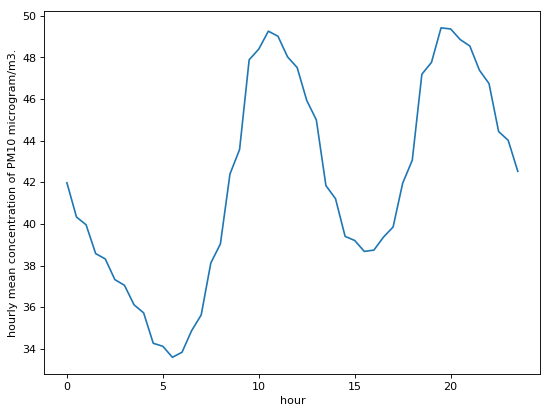

In [73]:
hourly_mean = np.mean(PM10,axis=0)
hours = [i/2 for i in range(48)]


figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(hours, hourly_mean)
plt.xlabel('hour')
plt.ylabel('hourly mean concentration of PM10 microgram/m3.')
plt.show()

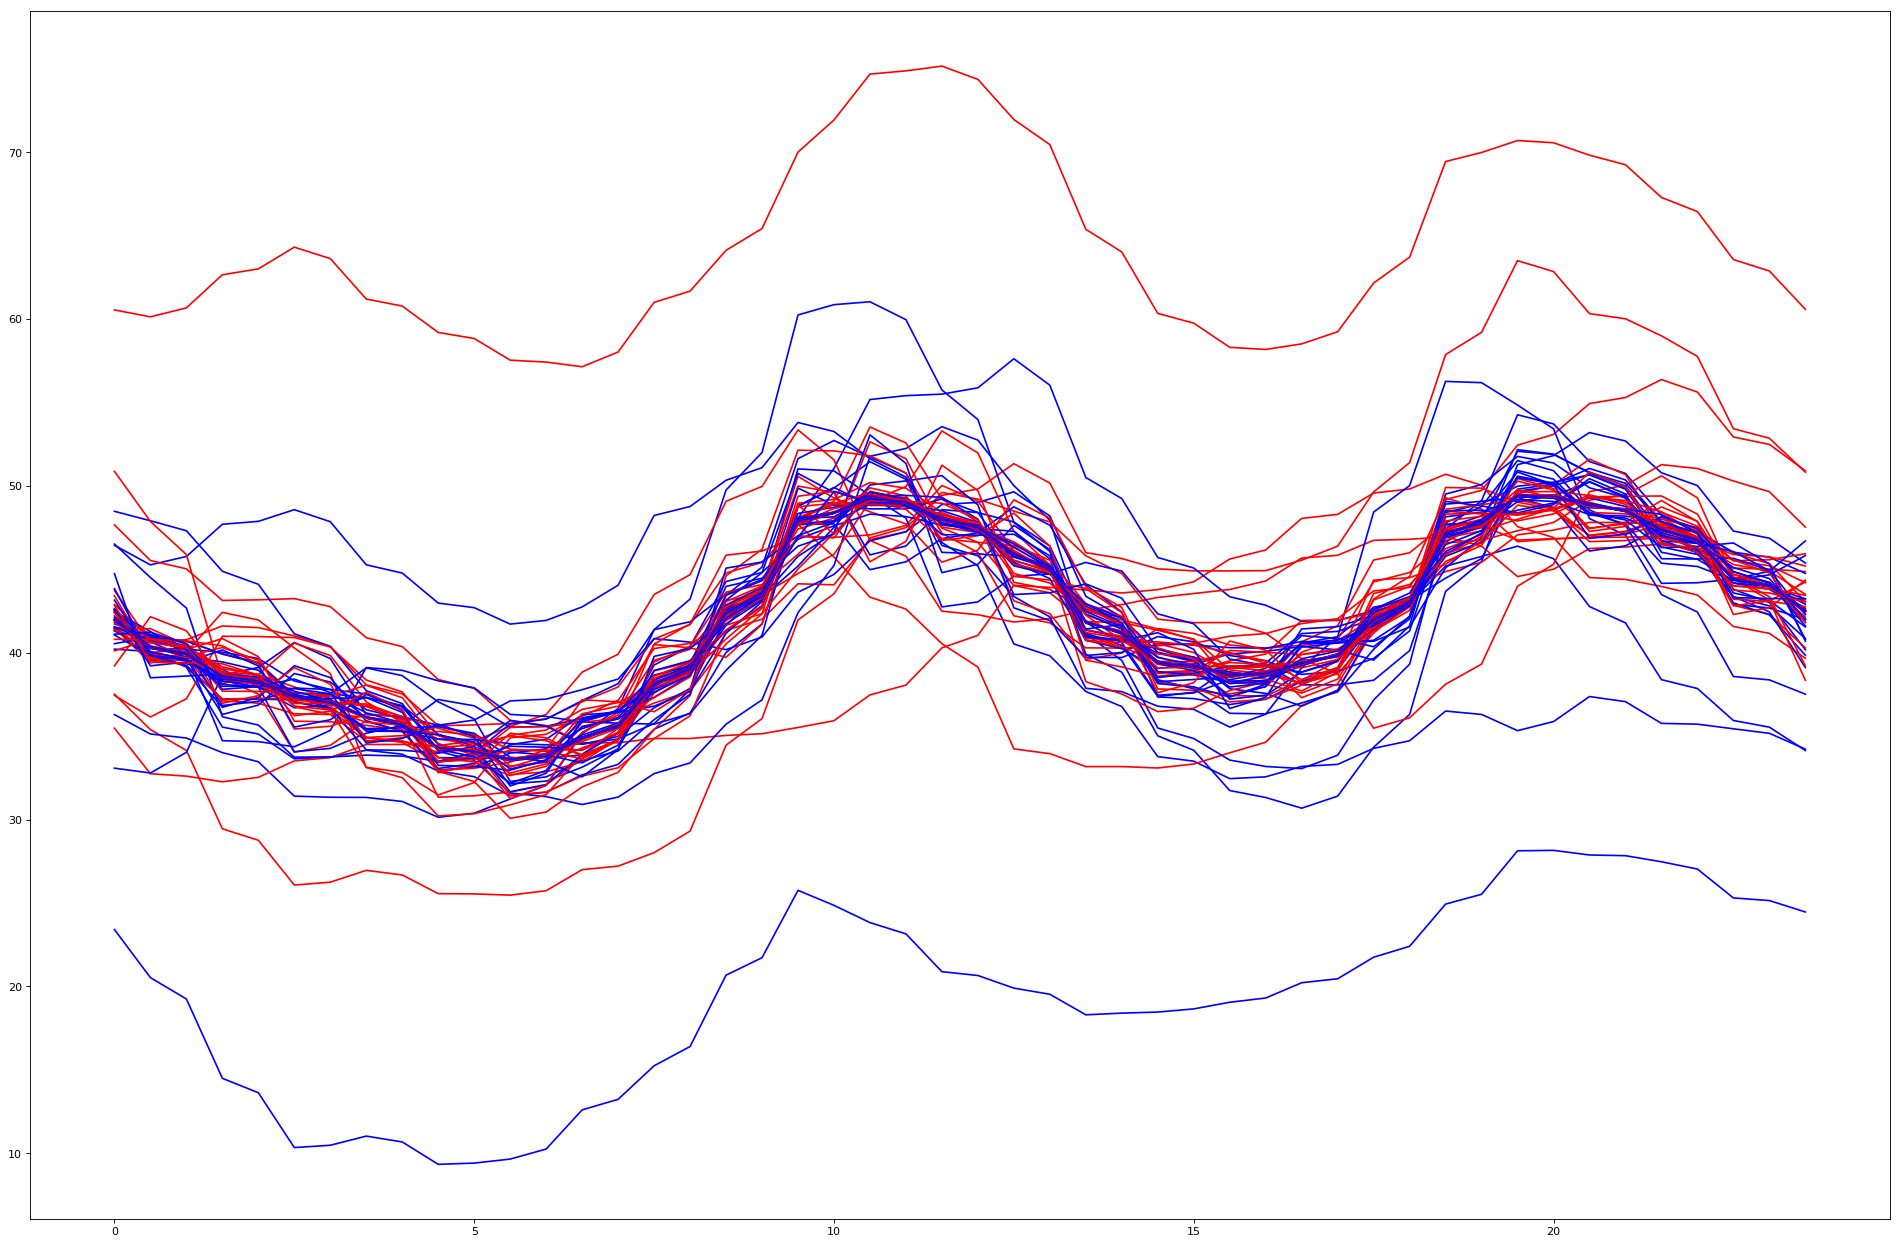

In [145]:
S = np.cov(PM10.transpose())

eigenValues, eigenVectors = LA.eig(S)
idx = eigenValues.argsort()[::-1]   
eigenValues= eigenValues[idx]
eigenVectors = eigenVectors[:,idx]
eigenVectors = eigenVectors.transpose()

mean_plus = np.zeros((48, 48))
mean_minus = np.zeros((48, 48))
for i in range(48):
    mean_plus[i] = hourly_mean
    mean_minus[i] = hourly_mean

for i,vec in enumerate(eigenVectors): 
    mean_plus[i] += m.sqrt(eigenValues[i])*vec
    mean_minus[i] -= m.sqrt(eigenValues[i])*vec

figure(num=None, figsize=(30, 20), dpi=80, facecolor='w', edgecolor='k')
for i in range(48):
    plt.plot(hours,  mean_plus[i,:],'r', alpha=1)
    plt.plot(hours,  mean_minus[i,:],'b', alpha=1)


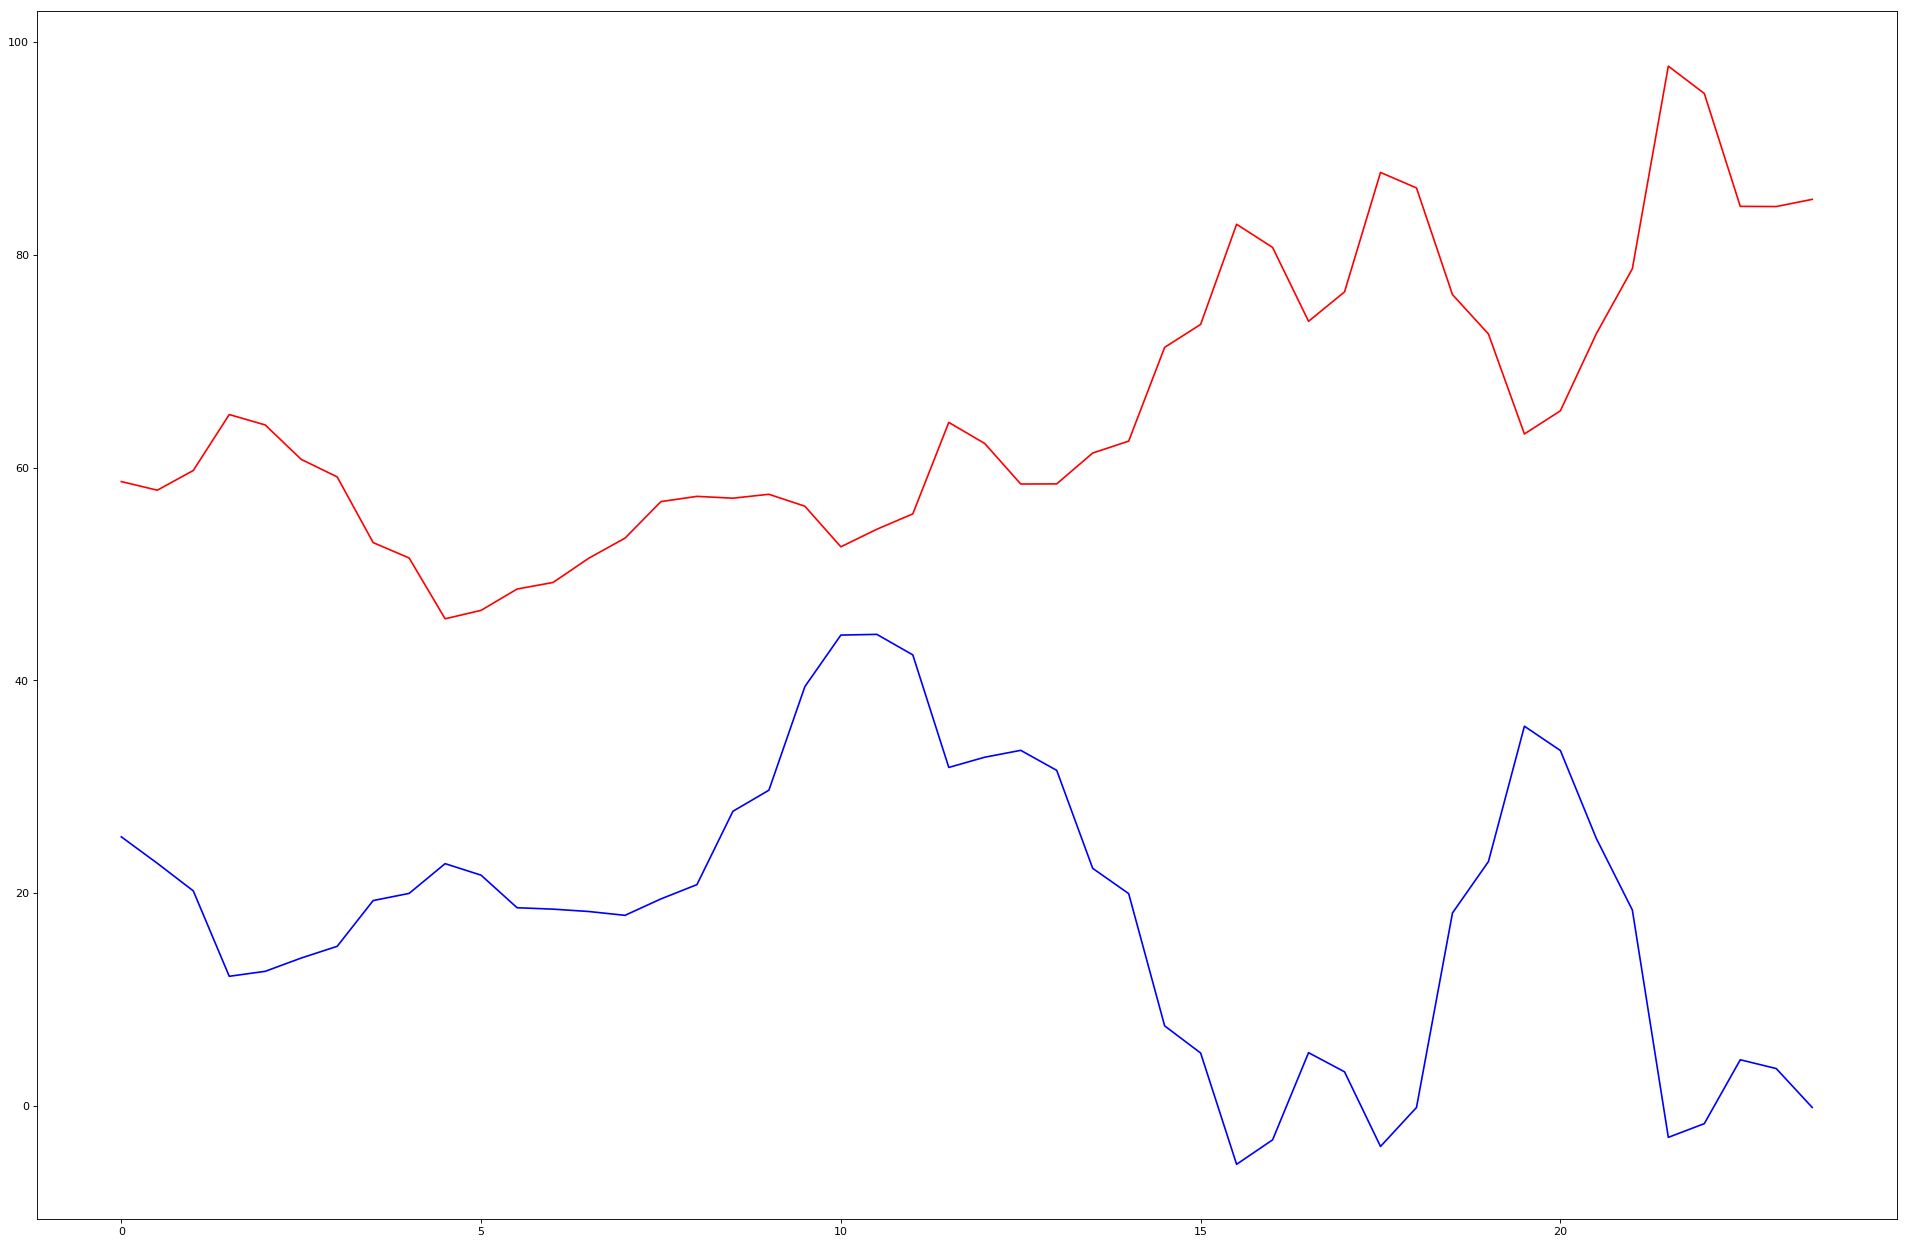

In [147]:
mean_plus = np.zeros((48, 48))
mean_minus = np.zeros((48, 48))
for i in range(48):
    mean_plus[i] = hourly_mean
    mean_minus[i] = hourly_mean

for i,vec in enumerate(eigenVectors): 
    mean_plus[0] += m.sqrt(eigenValues[i])*vec
    mean_minus[0] -= m.sqrt(eigenValues[i])*vec

figure(num=None, figsize=(30, 20), dpi=80, facecolor='w', edgecolor='k')
for i in range(1):
    plt.plot(hours,  mean_plus[i,:],'r', alpha=1)
    plt.plot(hours,  mean_minus[i,:],'b', alpha=1)

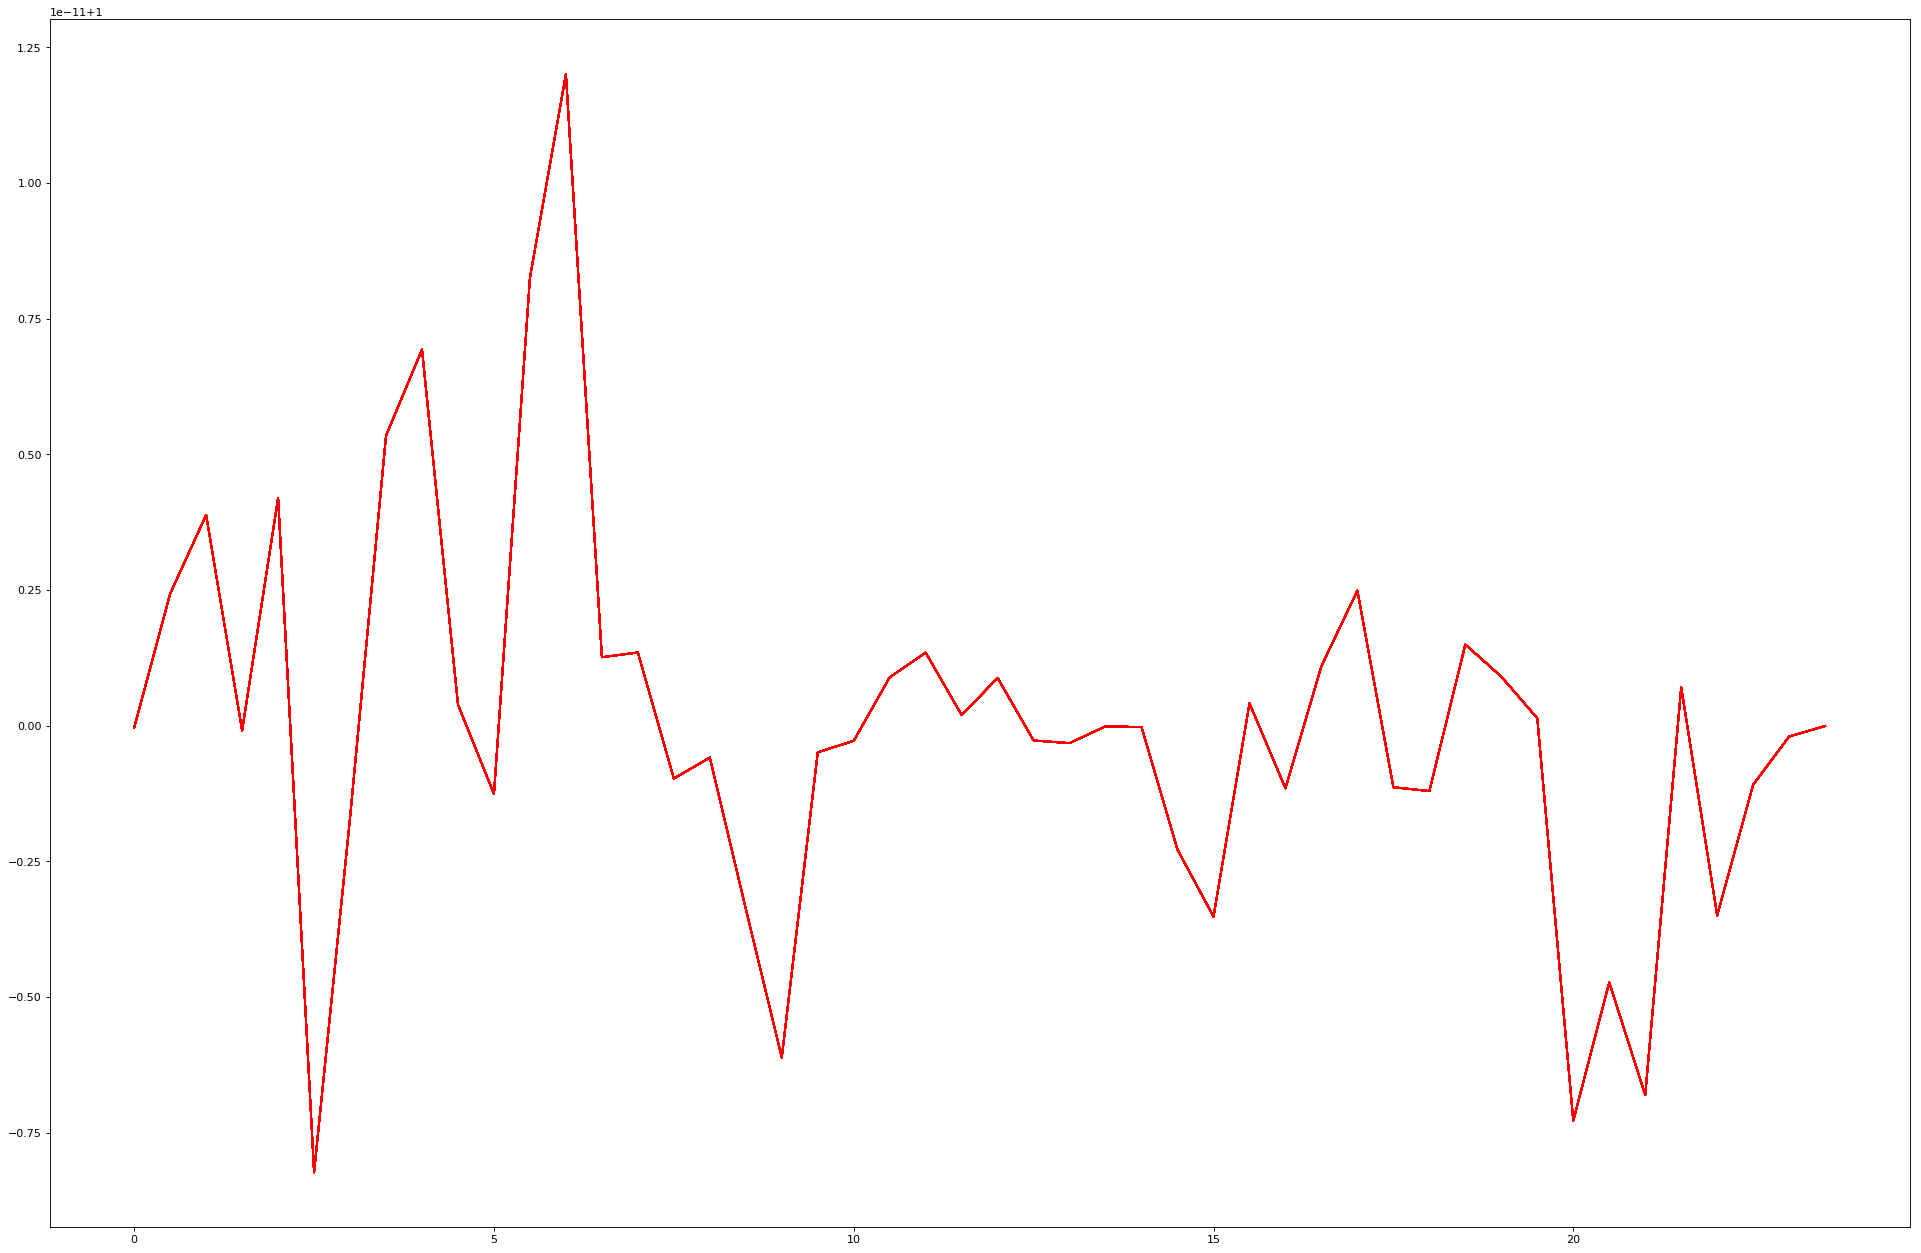

In [148]:
figure(num=None, figsize=(30, 20), dpi=80, facecolor='w', edgecolor='k')
for i in range(48):
    plt.plot(hours, LA.norm(eigenVectors,axis=0),'r', alpha=1)